In [155]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt       # чтобы выводить промежуточные фото в jupyter

# Список всех настроечных параметров/констант
WORK_DIR = 'pass_photos'
TEST_FILE = 'pass_photos/1.jpeg'
IMG_HEIGHT = 1000            # требуемый размер фото для нормализации всех изображений
IMG_WIDTH = 600              # т.к. в задачу входит прочитать только ФИО, обрезаю серию/номер чтобы не усложнять распознавание

In [156]:
# Функция для получения списка файлов из каталога с фотографиями (как в task_1 и task_2)
def get_files(directory: str) -> list:
    names = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpeg") or filename.endswith(".jpg") or filename.endswith(".png"):
            names.append(os.path.join(directory, filename))

    return names

In [157]:
def normalize_image(image: str):    
    img = cv2.imread(image)
    
    #kernel = np.ones((2, 2), 'uint8')
    #img = cv2.erode(img, kernel, iterations=1)
    
    # нормализуем фото к нужному размеру
    height, width, channels = img.shape
    resize_scale = IMG_HEIGHT / height       # получаем коэффициент масштабирования изображения
    img_width = int(width * resize_scale)    # высчитываем от этого коэффициента новую ширину
    img = cv2.resize(img, (img_width, IMG_HEIGHT))
    
    # обрезаем паспорт до страницы с фото
    height, width, _ = img.shape     # получаем новые размеры изображения, для корректной обрезки
    x0 = 60
    y0 = IMG_HEIGHT // 2    
    x1 = width if width < IMG_WIDTH else IMG_WIDTH
    y1 = IMG_HEIGHT
    img = img[y0:y1, x0:x1]
    
    #img = cv2.dilate(img, kernel, iterations=1)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    # преобразуем в ЧБ
    blur = cv2.GaussianBlur(gray, (5,5), 0)         # коэффициент размытия подобран вручную
    # при коэффициенте 3 - лучше распознается Васлевский, при 5 - Соколов и Юмакаева
    thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 5, 2)
    
    return thresh

In [158]:
# Выделяем элементы текста из изображения
def search_char():
    pass
    # Morph open to remove noise and invert image
    #kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    #opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
    #invert = 255 - opening
    
    # получаем контуры
    #contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    #output = img.copy()

    #for idx, contour in enumerate(contours):
    #    (x, y, w, h) = cv2.boundingRect(contour)
        # print("R", idx, x, y, w, h, cv2.contourArea(contour), hierarchy[0][idx])
        # hierarchy[i][0]: следующий контур текущего уровня
        # hierarchy[i][1]: предыдущий контур текущего уровня
        # hierarchy[i][2]: первый вложенный элемент
        # hierarchy[i][3]: родительский элемент
    #    if hierarchy[0][idx][3] == 0:
    #        cv2.rectangle(output, (x, y), (x + w, y + h), (70, 0, 0), 1)

In [159]:
passports = get_files(WORK_DIR)

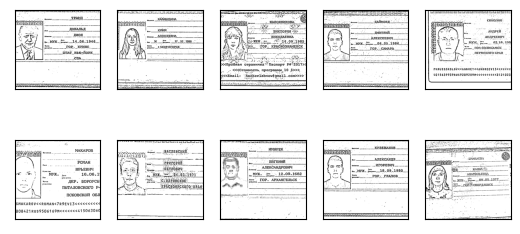

In [160]:
# Вывод результата обработки в таблицу
col = 5    # количество колонок таблицы
for i, p in enumerate(passports):
    image = normalize_image(p)
    cv2.imwrite(f'pass_temp/{i}.jpg', image)
    
    plt.subplot(len(passports)//col+1, col, i+1)    # высчитываем высоту таблицы от количества колонок и общего размера списка
    plt.imshow(image, 'gray')
    # plt.title(p)
    plt.xticks([]),plt.yticks([])
plt.show()